In [113]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [156]:
# read image, to gray and normalize
img_name = './pic/13.bmp'
img = cv2.imread(img_name)
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
img = (img - np.min(img)) / (np.max(img)-np.min(img))

In [157]:
# calculate laplacien and gradient of img 
laplace = cv2.Laplacian(img, -1, ksize=3)

grad_x = cv2.Sobel(img, -1, 1, 0)
grad_y = cv2.Sobel(img, -1, 0, 1)
gradx = cv2.convertScaleAbs(grad_x)
grady = cv2.convertScaleAbs(grad_y)
gradient = np.sqrt(gradx**2+grady**2)

In [78]:
print((laplace<=0).sum())
print(gradient)
print(gradient.mean())
print(gradient.max())
print(np.sum(gradient>=1.5))

155855
[[0.    0.    0.    ... 0.    1.    0.   ]
 [0.    0.    0.    ... 0.    1.    0.   ]
 [0.    0.    0.    ... 0.    1.    0.   ]
 ...
 [0.    0.    0.    ... 0.    3.    0.   ]
 [4.    4.    3.    ... 3.    2.828 1.   ]
 [0.    0.    0.    ... 0.    1.    0.   ]]
0.09436
4.125
2020


In [158]:
# get boundary pixels
flag1 = (gradient <= 0)
flag2 = (laplace >= 0.015)
boundary = flag1 & flag2
print(np.sum(boundary))

99343


In [173]:
# get value of threshold
threshold = np.sum(img * boundary) / np.sum(boundary)
print(threshold)



0.5133018228003597


In [174]:
# threshold segmentation
retval, segmentation = cv2.threshold(img, threshold, 1, cv2.THRESH_BINARY)

In [165]:
save_img_name = img_name.split('/')[-1].split('.')[0] + '_seg.png'
save_img_name

'13_seg.png'

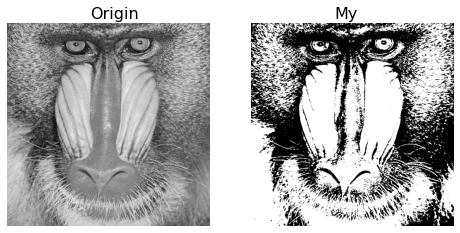

In [175]:
plt.figure(figsize=(8, 8))

plt.subplot(1, 2, 1)
plt.axis('off')
plt.imshow(img, cmap='gray')
plt.text(220, -10, 'Origin', fontsize=16)
plt.subplot(1, 2, 2)
plt.axis('off')
plt.imshow(segmentation, cmap='gray')
plt.text(220, -10, 'My', fontsize=16)
plt.savefig(save_img_name, dpi=500, facecolor='w')

In [119]:
help(plt.subplot)

Help on function subplot in module matplotlib.pyplot:

subplot(*args, **kwargs)
    Add an Axes to the current figure or retrieve an existing Axes.
    
    This is a wrapper of `.Figure.add_subplot` which provides additional
    behavior when working with the implicit API (see the notes section).
    
    Call signatures::
    
       subplot(nrows, ncols, index, **kwargs)
       subplot(pos, **kwargs)
       subplot(**kwargs)
       subplot(ax)
    
    Parameters
    ----------
    *args : int, (int, int, *index*), or `.SubplotSpec`, default: (1, 1, 1)
        The position of the subplot described by one of
    
        - Three integers (*nrows*, *ncols*, *index*). The subplot will take the
          *index* position on a grid with *nrows* rows and *ncols* columns.
          *index* starts at 1 in the upper left corner and increases to the
          right. *index* can also be a two-tuple specifying the (*first*,
          *last*) indices (1-based, and including *last*) of the subplo

-1